In [29]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/weather.csv')
df.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


min: 36.752000000000685, max: 98.90599999999992
total null count: 5


Text(0.5, 0, 'Frequency')

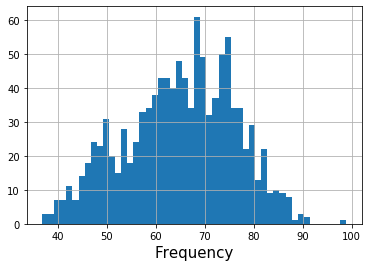

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# histogram
df['air_temp_9am'].hist(bins=50)
print('min: {}, max: {}'.format(df['air_temp_9am'].min(), df['air_temp_9am'].max()))
total_nulls = len(df) - df['air_temp_9am'].count()
print('total null count: {}'.format(total_nulls))

plt.xlabel("Air Temperature", fontsize=15)
plt.xlabel("Frequency", fontsize=15)

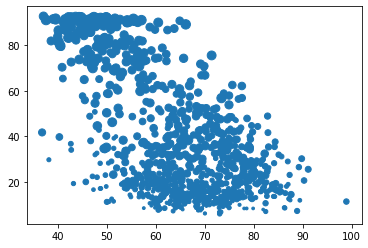

In [11]:
# scatter plot
plt.scatter(df['air_temp_9am'], df['relative_humidity_9am'], s=df['relative_humidity_3pm'])

In [16]:
# bar chart

# create a new column to specify wind direction
def get_direction(row):
    wind_direction = row['max_wind_direction_9am']
    direction_label = 'unknown'
    if(wind_direction < 45 or wind_direction > 315):
        direction_label = 'N'
    elif(wind_direction < 135):
        direction_label = 'E'
    elif(wind_direction < 225):
        direction_label = 'S'
    elif(wind_direction < 315):
        direction_label = 'W'
        
    return direction_label
  
df['wind_direction_label'] = df.apply(get_direction, axis=1)
df.head()

['W' 'S' 'E' 'N' '']


,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm,wind_direction_label
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000,W
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597,S
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000,E
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547,S
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000,S


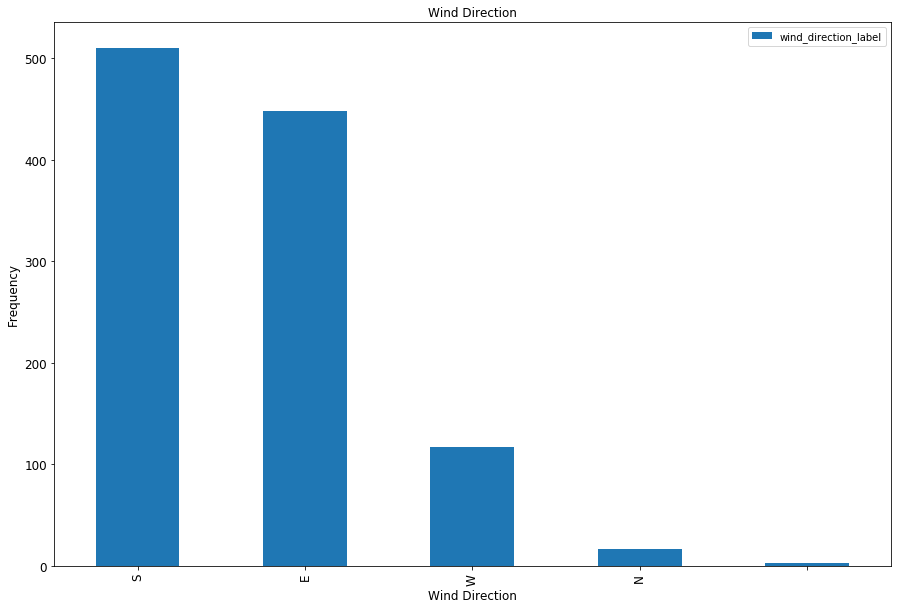

In [19]:
plot_bar = df['wind_direction_label'].value_counts().plot(kind='bar', title='Wind Direction',figsize=(15, 10), legend=True, fontsize=12)
plot_bar.set_xlabel("Wind Direction", fontsize=12)
plot_bar.set_ylabel("Frequency", fontsize=12)
plt.show()

In [21]:
# first create a binary categorical variable column
def get_humidity_level(row):
    air_pressure = row['relative_humidity_9am']
    humidity_label = 'unknown'
    if(air_pressure <= 25):
        humidity_label = 'low humidity day'
    elif(air_pressure > 25):
        humidity_label = 'high humidity day'
        
    return humidity_label

df['humidity_label'] = df.apply(get_humidity_level, axis=1)
df.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm,wind_direction_label,humidity_label
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000,W,high humidity day
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597,S,low humidity day
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000,E,low humidity day
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547,S,low humidity day
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000,S,high humidity day


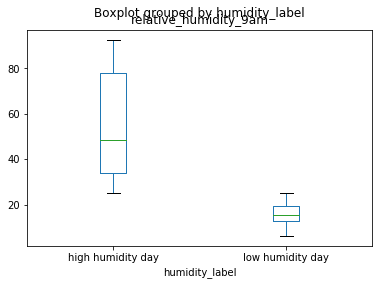

In [25]:
# box plot
df.boxplot(by='humidity_label', column=['relative_humidity_9am'], grid=False)

In [26]:
# maximun average speed wind measurement at 9am
df['avg_wind_speed_9am'].max()

23.554978199999766

In [27]:
# total null values in rain accumulation column
df['rain_accumulation_9am'].isna().sum()

6

In [31]:
# find the max wind direction obtained when the max wind speed occurs
df.loc[df['max_wind_speed_9am'].idxmax()]

number                     97.000000
air_pressure_9am          921.540000
air_temp_9am               43.160000
avg_wind_direction_9am     52.500000
avg_wind_speed_9am         23.554978
max_wind_direction_9am     68.000000
max_wind_speed_9am         29.840780
rain_accumulation_9am       0.050000
rain_duration_9am         100.000000
relative_humidity_9am      19.380000
relative_humidity_3pm      18.380000
Name: 97, dtype: float64